In [41]:
import pickle
from utils import plot_optimal_q
from utils import plot_td_error, plot_v_s, plot_start_end_time, plot_history
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
temp = pd.read_csv('temp_data.csv')
test = pd.read_csv('test_data.csv')

In [7]:
 with open('data/shA_v3/sarsa_1.pickle', 'rb') as f:
    x = pickle.load(f)

## Plot start and end time 
* One peaks in both distributions
* Each peak is around 8 hrs apart

In [3]:
# load pickle files, sample 1000 from each pickle
sample_list = []
sample_size = 1000
for i in [1,3,7,10]:
    path = f'data/shA_v4/sarsa_{i}.pickle'
    with open(path, 'rb') as f:
        sample_list.append(pickle.load(f))#.sample(sample_size))
samples = pd.concat(sample_list, axis=0)
print('sample shape: ', samples.shape)

sample shape:  (3075217, 6)


Shift A -- Morning shift


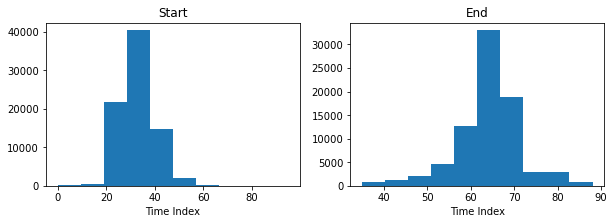

In [4]:
print('Shift A -- Morning shift')
plot_start_end_time(samples)

sample shape:  (3829784, 6)
Shift B -- Night shift


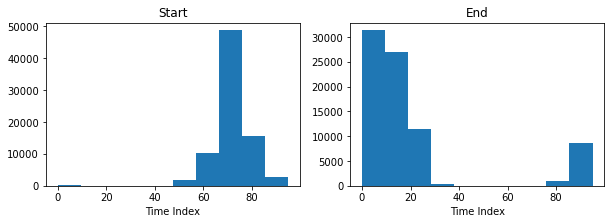

In [6]:
# load pickle files, sample 1000 from each pickle
sample_list_B = []
sample_size = 1000
for i in [1,3,7,10]:
    path = f'data/shB_v4/sarsa_{i}.pickle'
    with open(path, 'rb') as f:
        sample_list_B.append(pickle.load(f))#.sample(sample_size))
samples_B = pd.concat(sample_list_B, axis=0)
print('sample shape: ', samples_B.shape)

print('Shift B -- Night shift')
plot_start_end_time(samples_B)

## Shift A v04

In [57]:
with open('output/shA_v4/emp_history_shA.pkl', 'rb') as f:
    history_shA_v4 = pickle.load(f)
with open('output/shA_v4/emp_Q_shA.pkl', 'rb') as f:
    Q_shA_v4 = pickle.load(f)

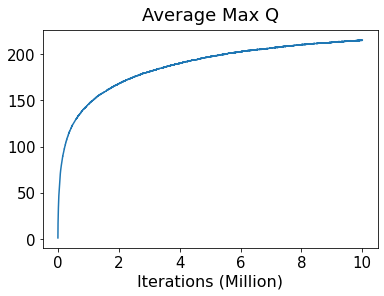

In [60]:
plot_history(history_shA_v4['mean_max_q'][:100000], save_path='output/shA_v4/avg_max_q.png')

saved at  output/shA_v4/avg_td_error.png


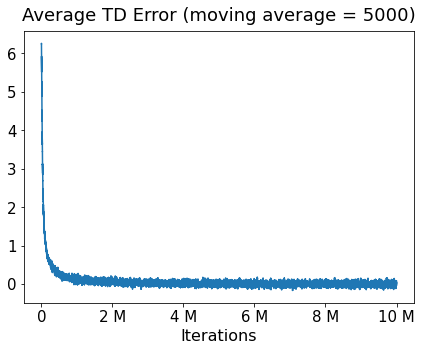

In [61]:
plot_td_error(history_shA_v4['mean_td_delta'][:10000000], n=5000, save_path='output/shA_v4/avg_td_error.png')

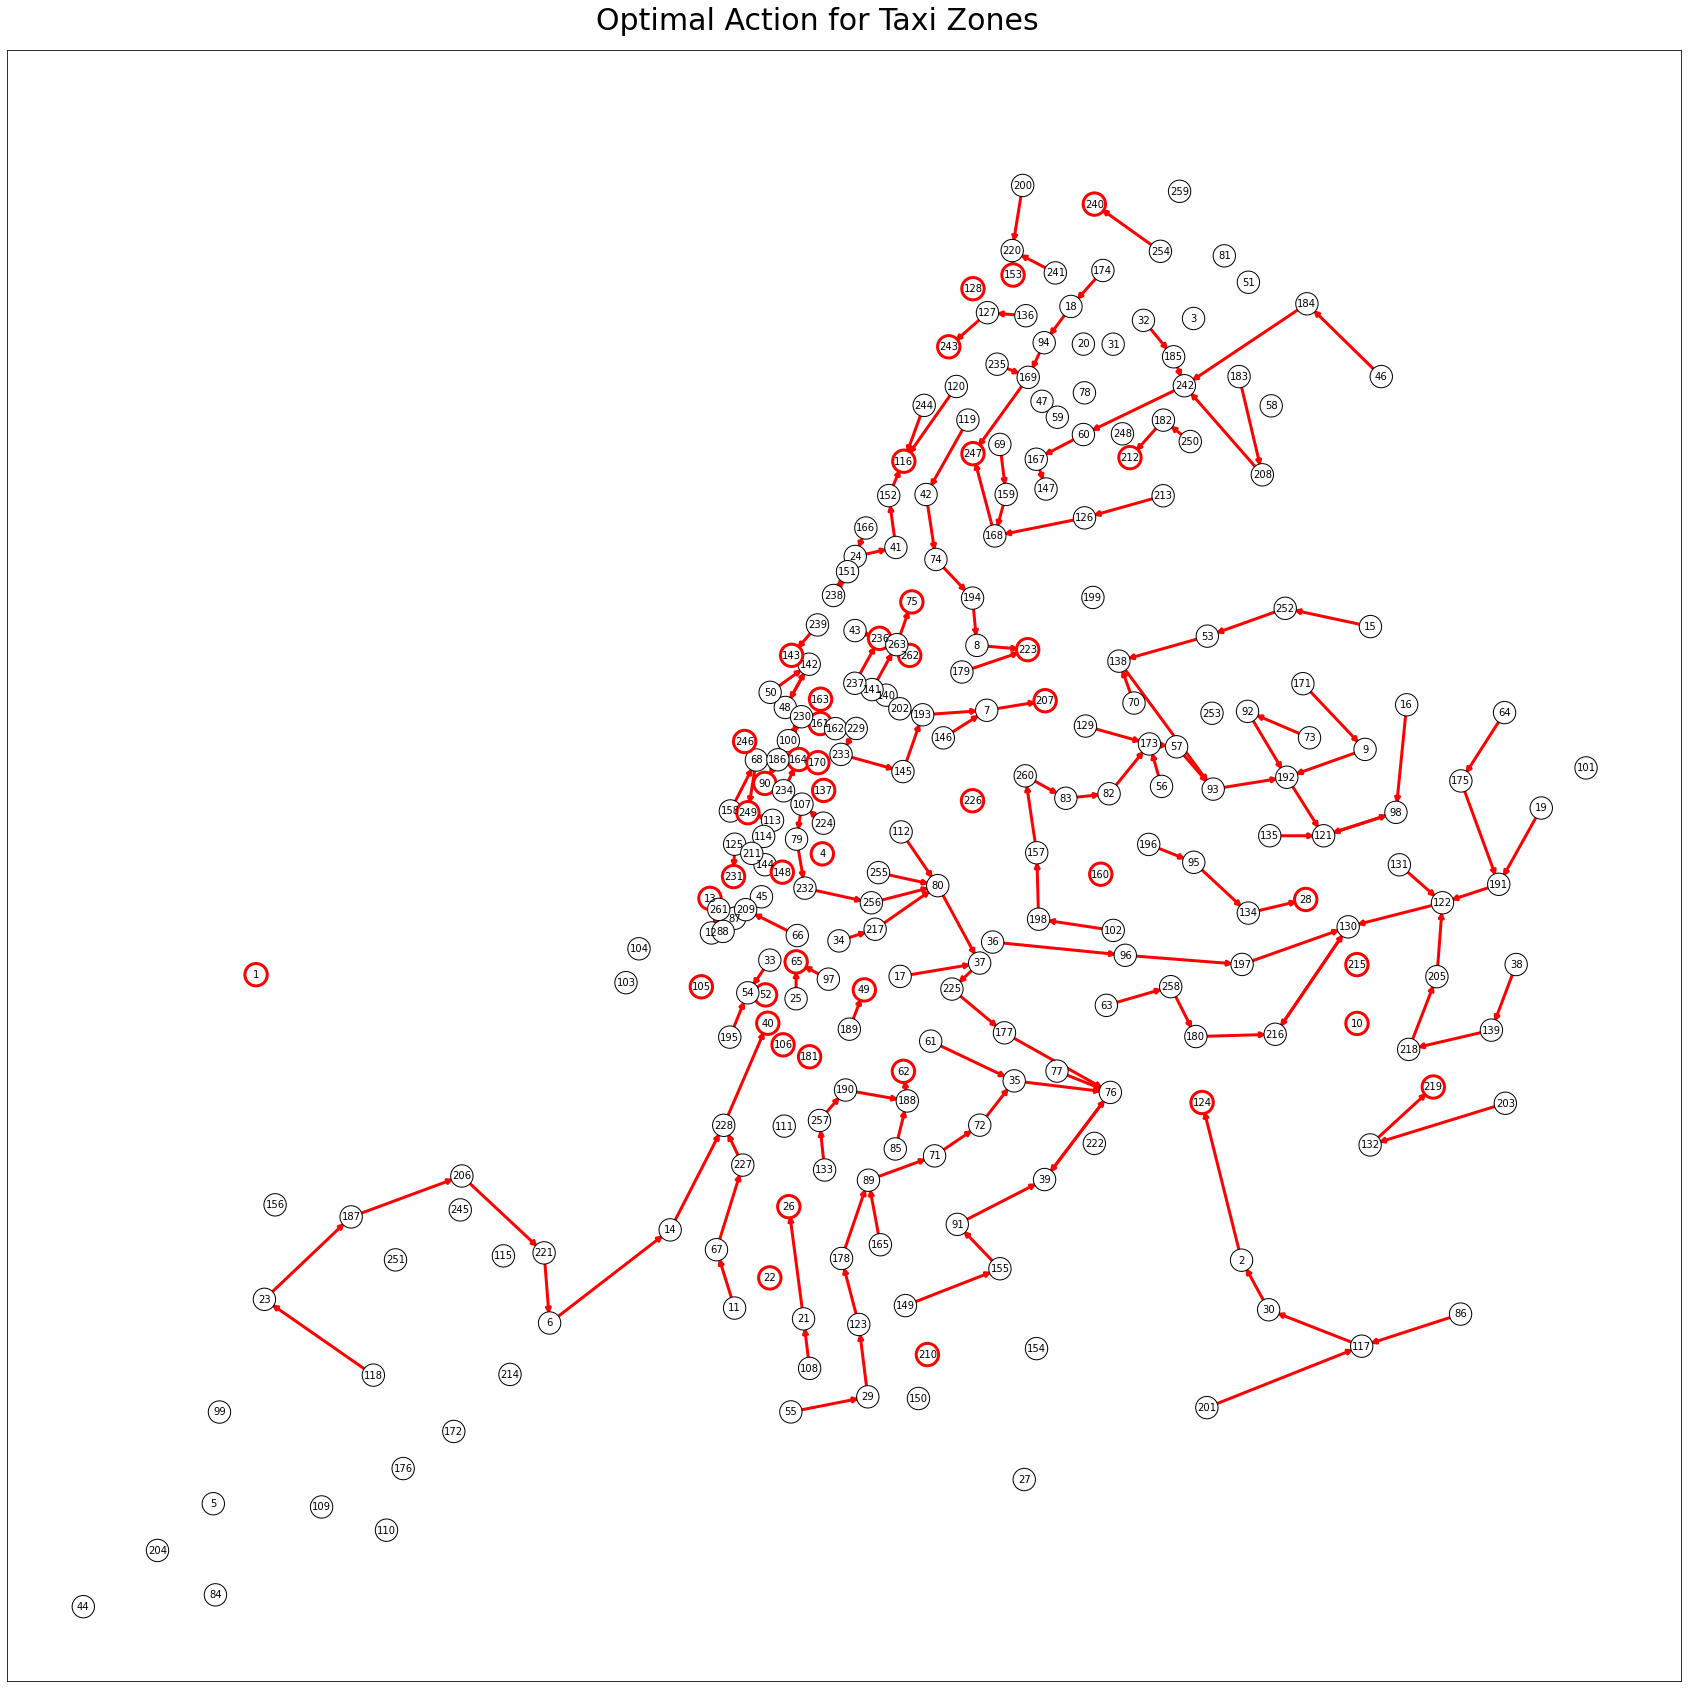

In [23]:
t = 4*16
v = plot_optimal_q(q_path='output/shA_v4/emp_Q_shA.pkl', 
               shp_file='data/taxi_zones/taxi_zones.shp', t=t, 
               all_nodes=True, save_path = f'output/shA_v4/optimal_Q_t{t}.png')

## Shift B v04

In [21]:
with open('output/shB_v4/emp_history_shB.pkl', 'rb') as f:
    history_shB_v4 = pickle.load(f)
with open('output/shB_v4/emp_Q_shB.pkl', 'rb') as f:
    Q_shB_v4 = pickle.load(f)

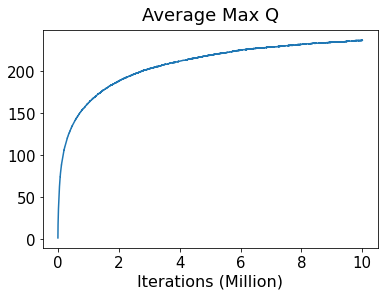

In [62]:
plot_history(history_shB_v4['mean_max_q'][:100000], save_path='output/shB_v4/avg_max_q.png')

saved at  output/shB_v4/avg_td_error.png


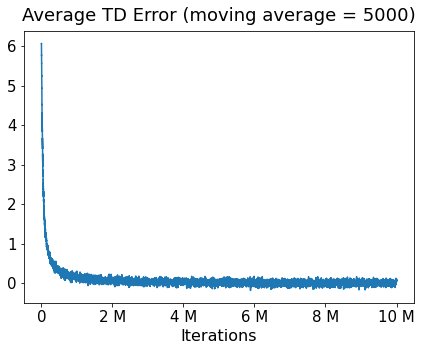

In [63]:
plot_td_error(history_shB_v4['mean_td_delta'][:10000000], n=5000, save_path='output/shB_v4/avg_td_error.png')

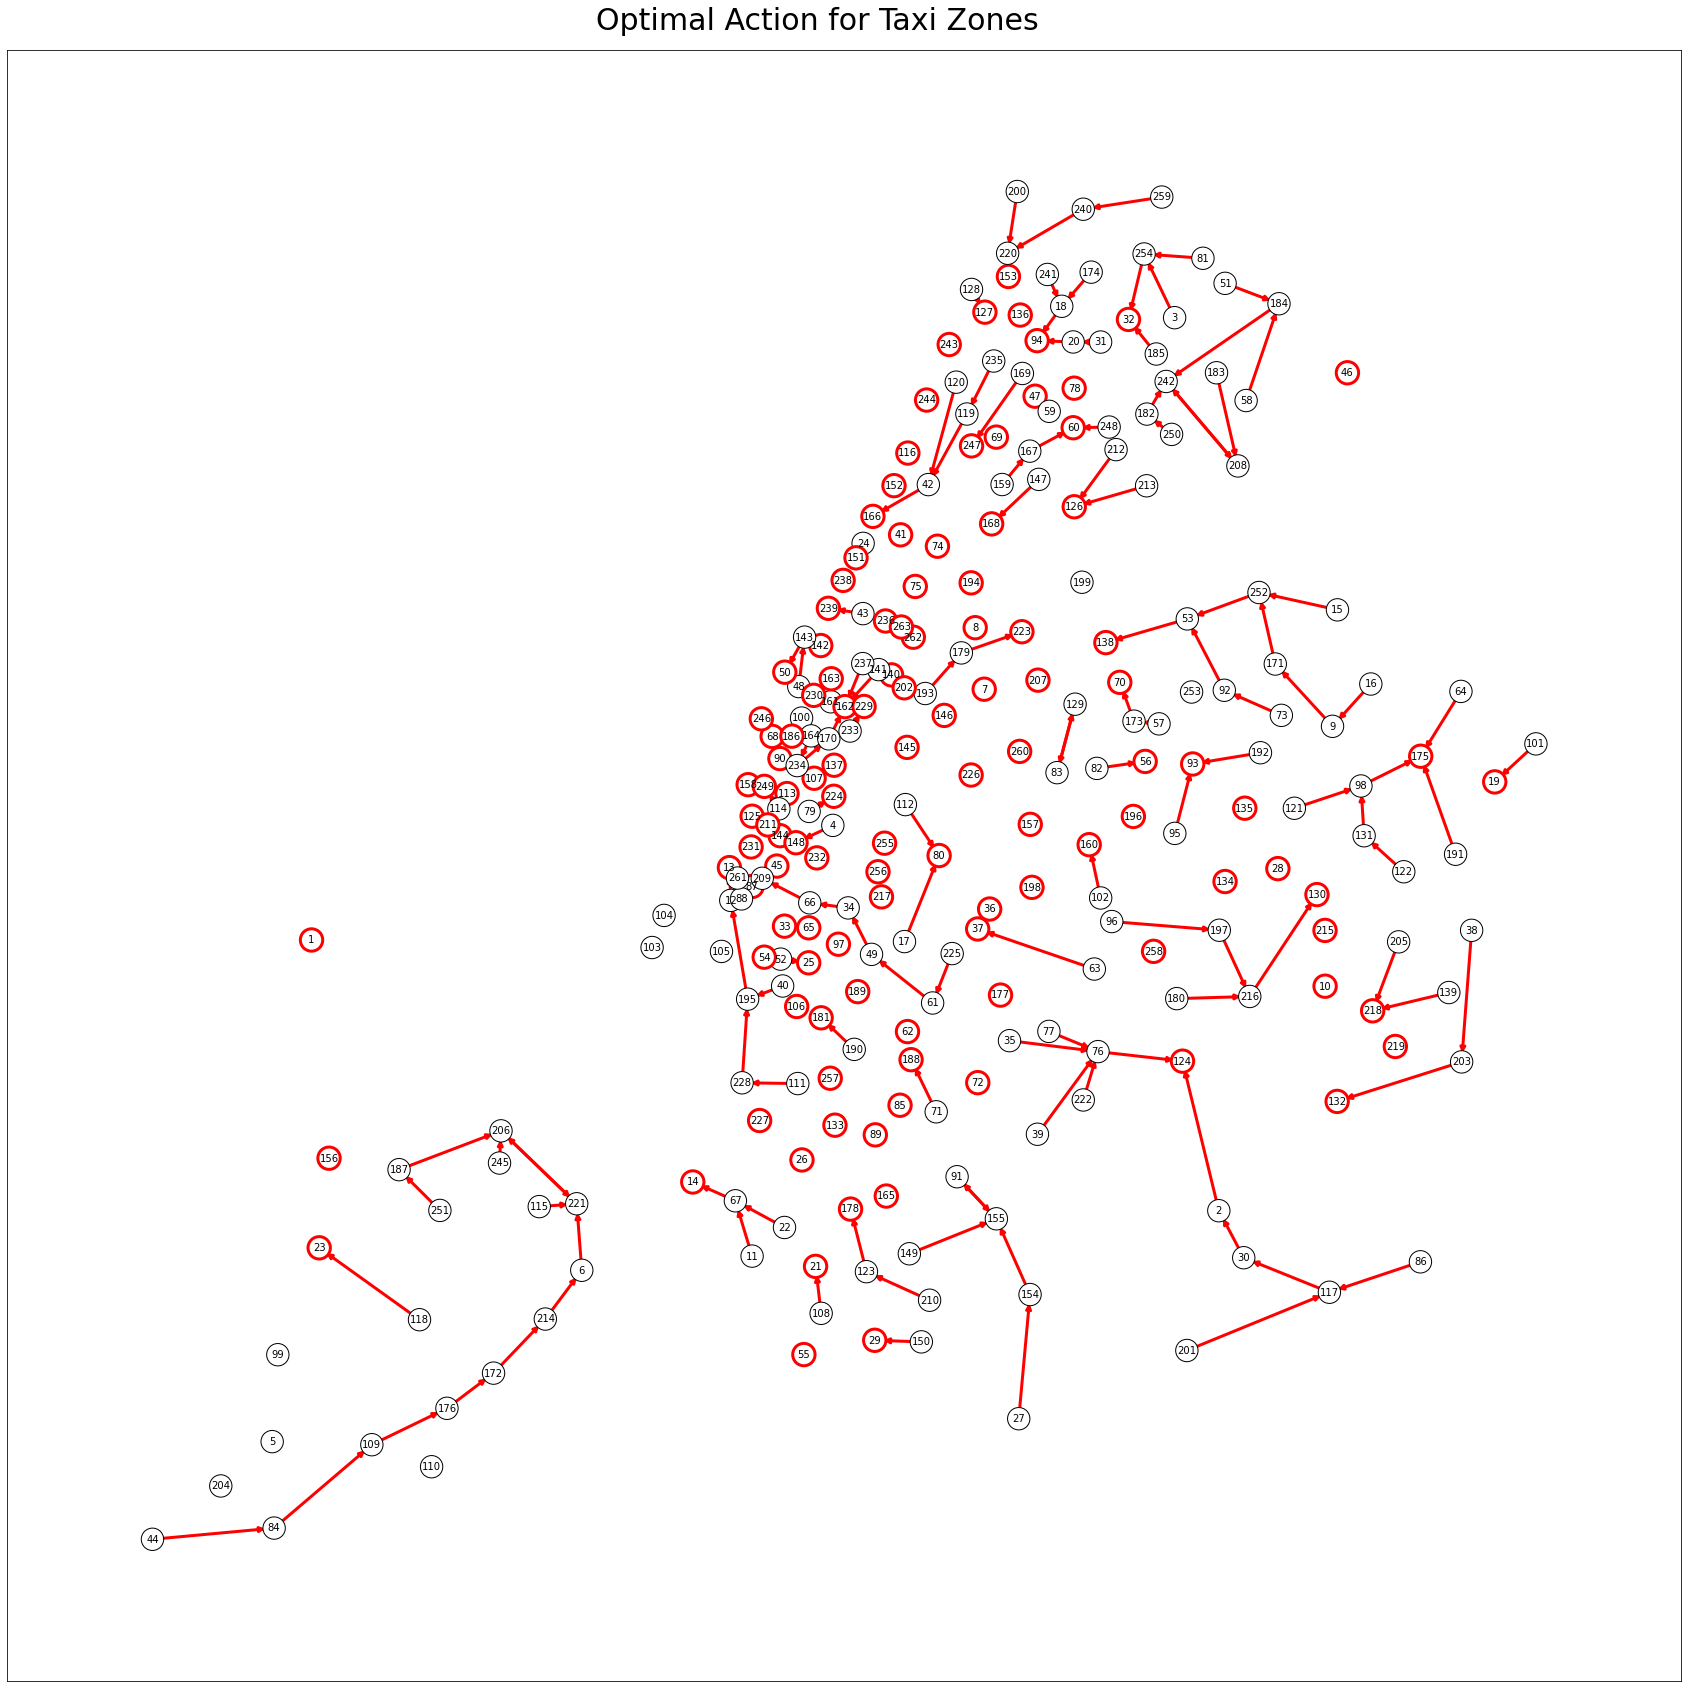

In [31]:
t = 4*20
v = plot_optimal_q(q_path='output/shB_v4/emp_Q_shB.pkl', 
               shp_file='data/taxi_zones/taxi_zones.shp', t=t, 
               all_nodes=True, save_path = f'output/shA_v4/optimal_Q_t{t}.png')

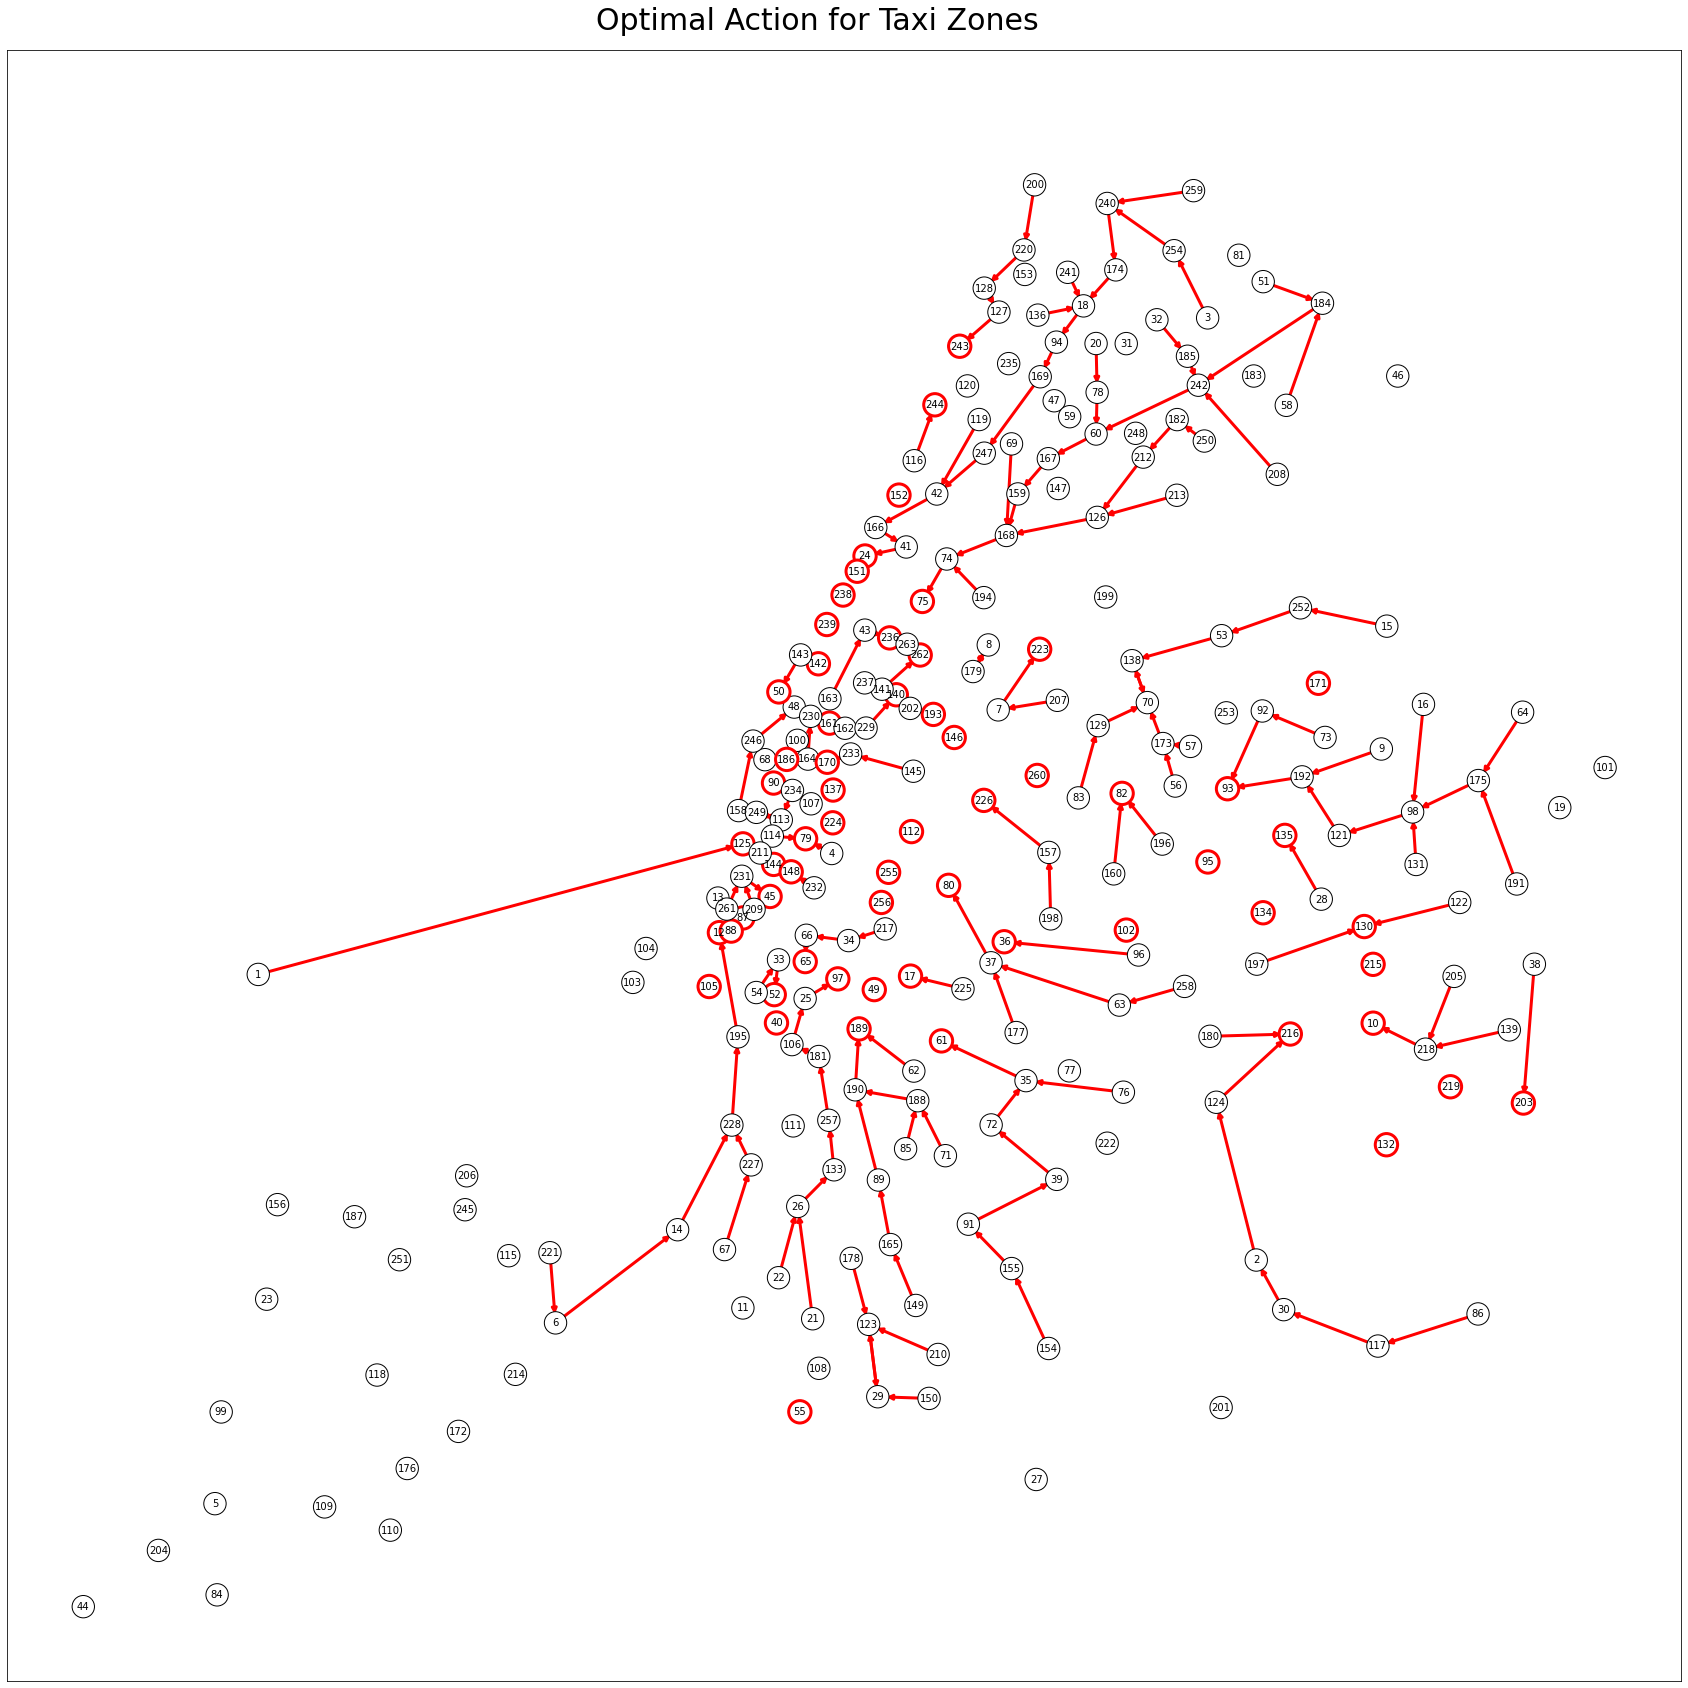

In [29]:
t = 4*16
v = plot_optimal_q(q_path='output/shB_v4/emp_Q_shB.pkl', 
               shp_file='data/taxi_zones/taxi_zones.shp', t=t, 
               all_nodes=True, save_path = f'output/shA_v4/optimal_Q_t{t}.png')

## Shift A v03

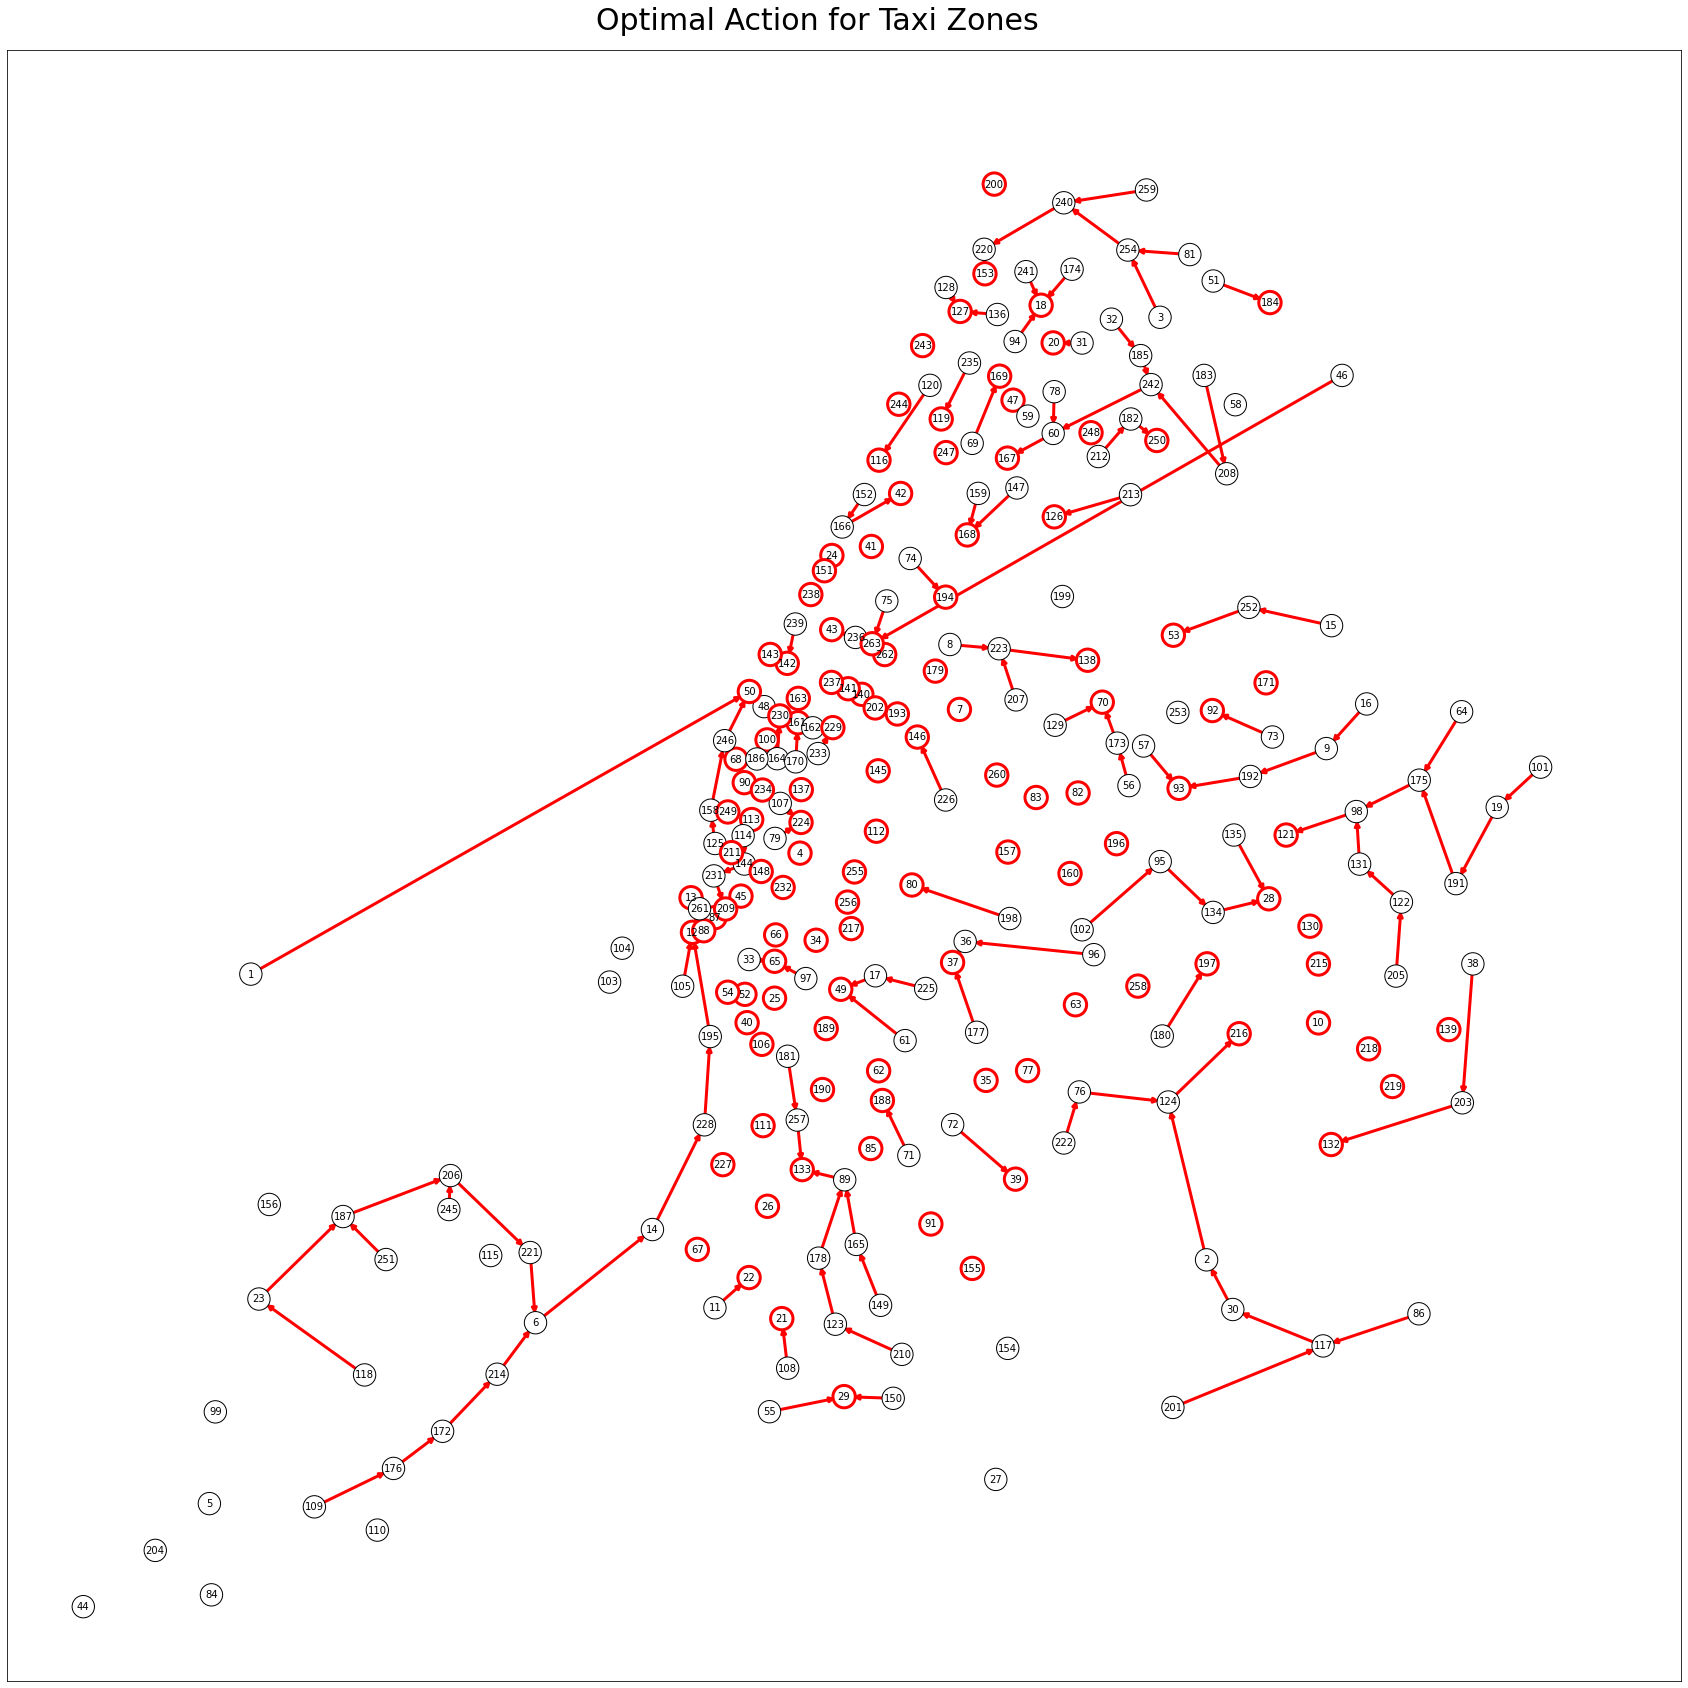

In [66]:
t = 4*12
v = plot_optimal_q(q_path='output/shA_v3_1204/emp_Q_v02_shA_01.pkl', 
               shp_file='data/taxi_zones/taxi_zones.shp', t=t, 
               all_nodes=True, save_path = f'output/shA_v3_1204/optimal_Q_t{t}.png')

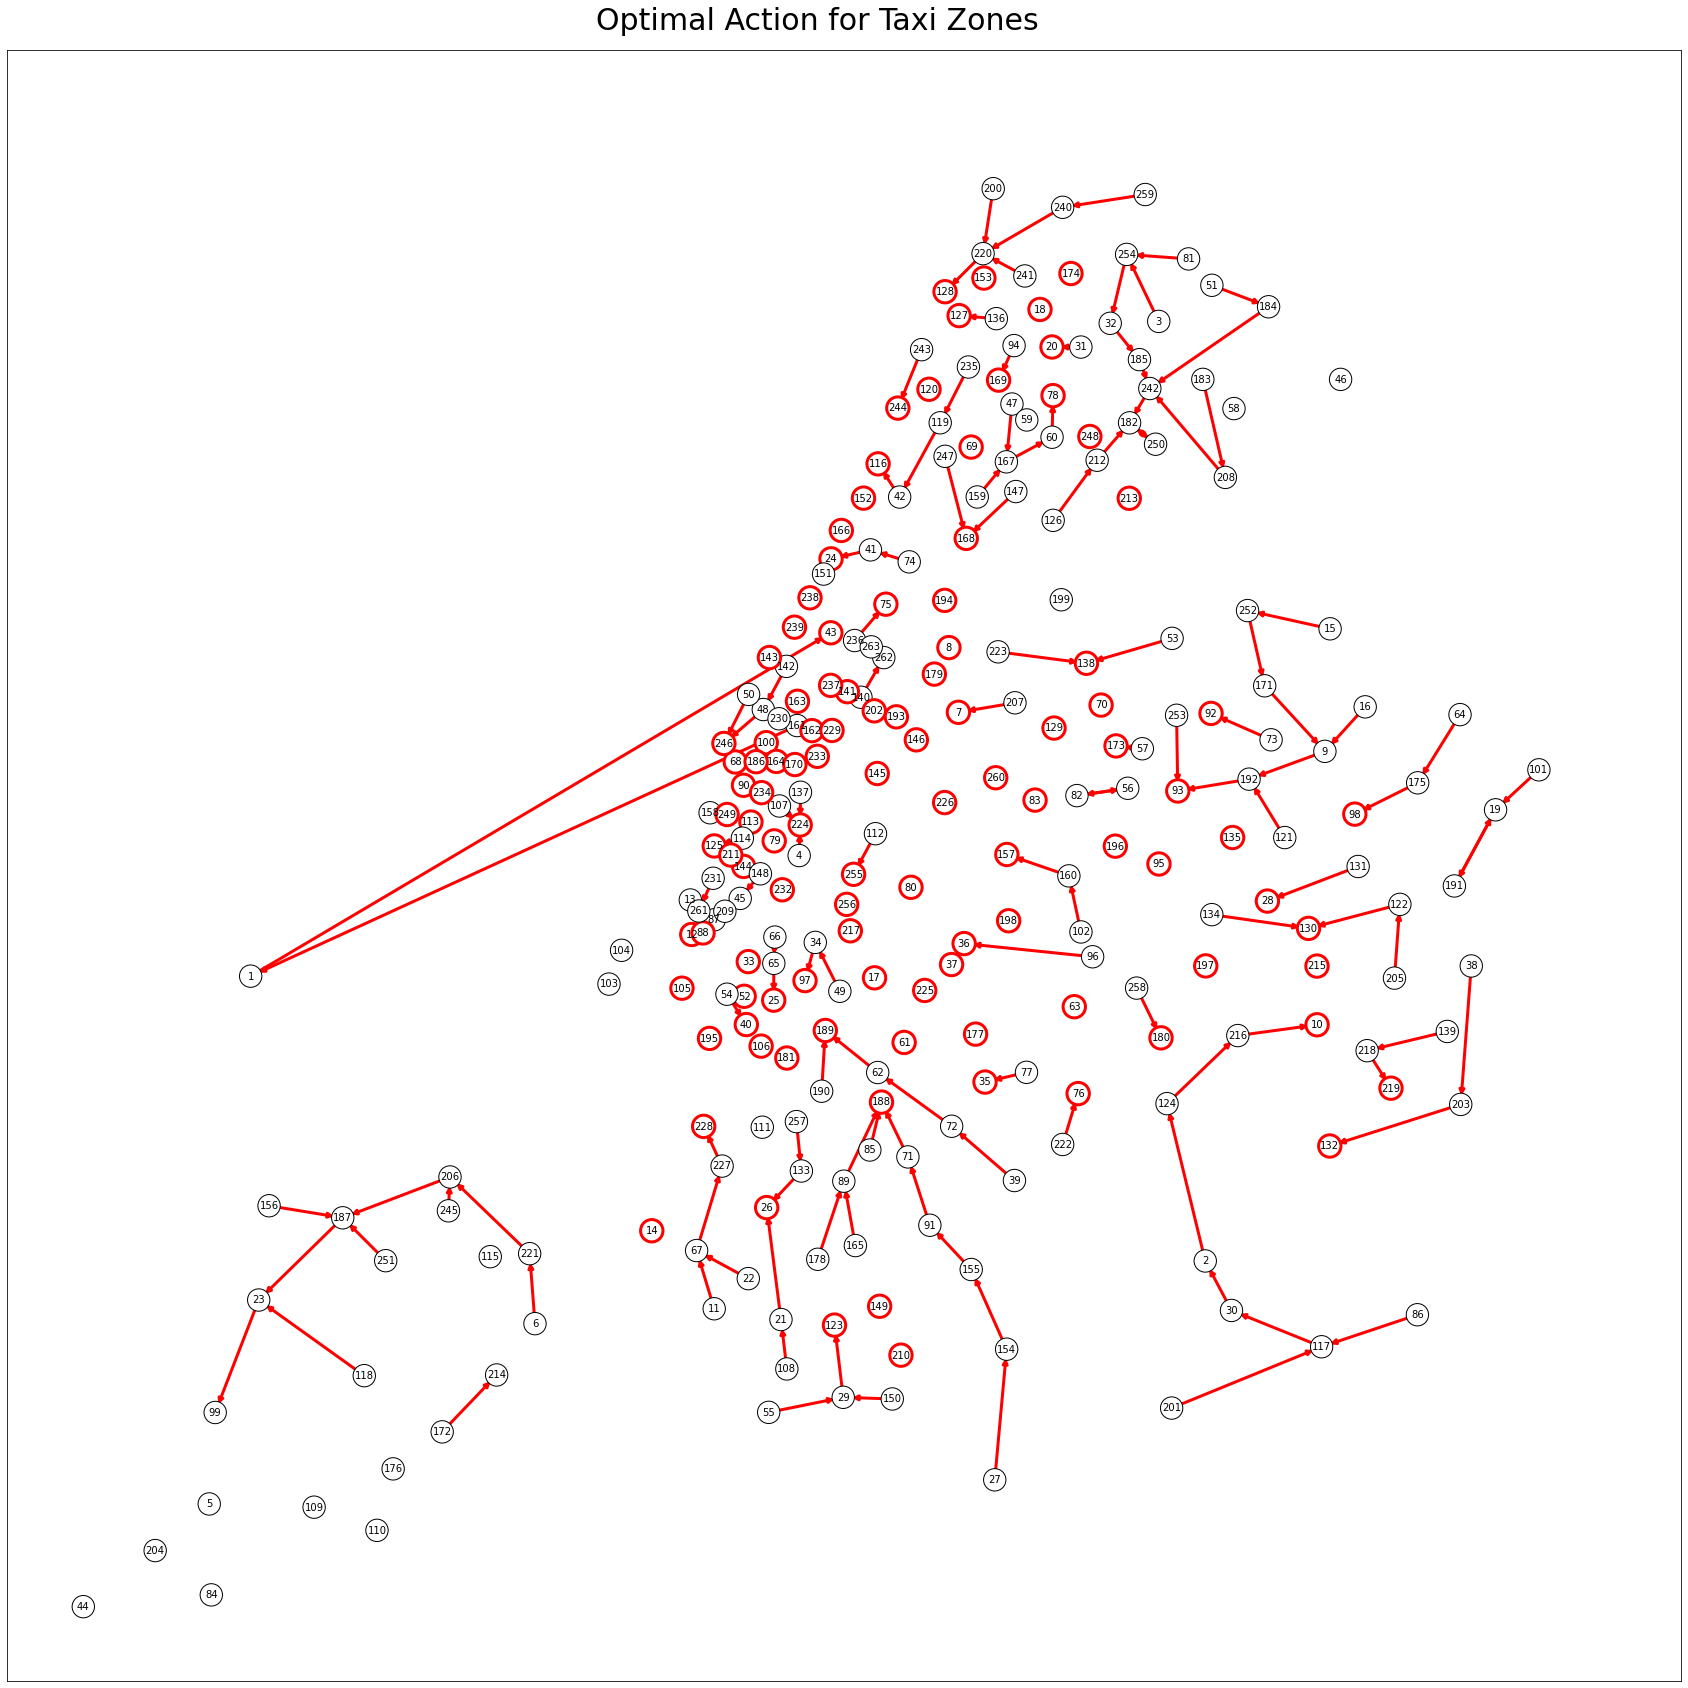

In [67]:
t = 4*8
v = plot_optimal_q(q_path='output/shA_v3_1204/emp_Q_v02_shA_01.pkl', 
               shp_file='data/taxi_zones/taxi_zones.shp', t=t, 
               all_nodes=True, save_path = f'output/shA_v3_1204/optimal_Q_t{t}.png')

In [70]:
with open('output/shA_v3_1204/emp_history_shA.pkl', 'rb') as handle:
    emp_history = pickle.load(handle)

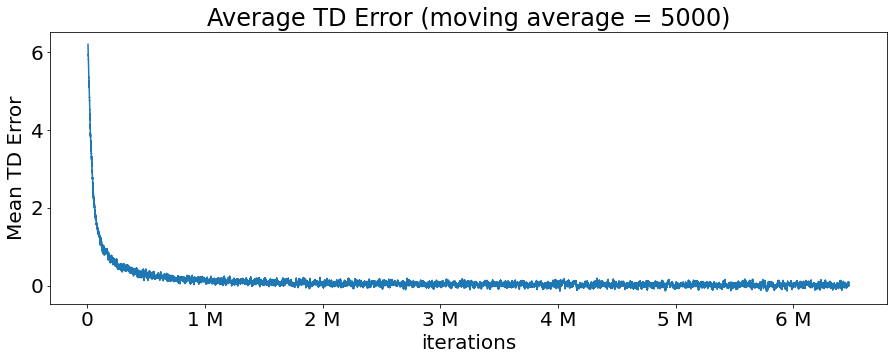

In [74]:
plot_td_error(emp_history['mean_td_delta'])

Text(0.5, 0, 'Iterations (in a hundred)')

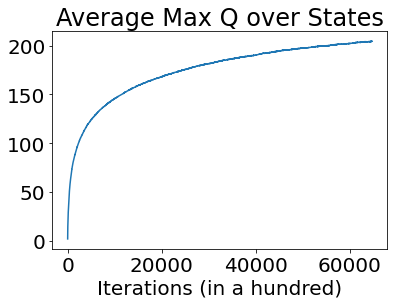

In [75]:
plt.plot(range(len(emp_history['mean_max_q'])), emp_history['mean_max_q'])
plt.title('Average Max Q over States')
plt.xlabel('Iterations (in a hundred)')

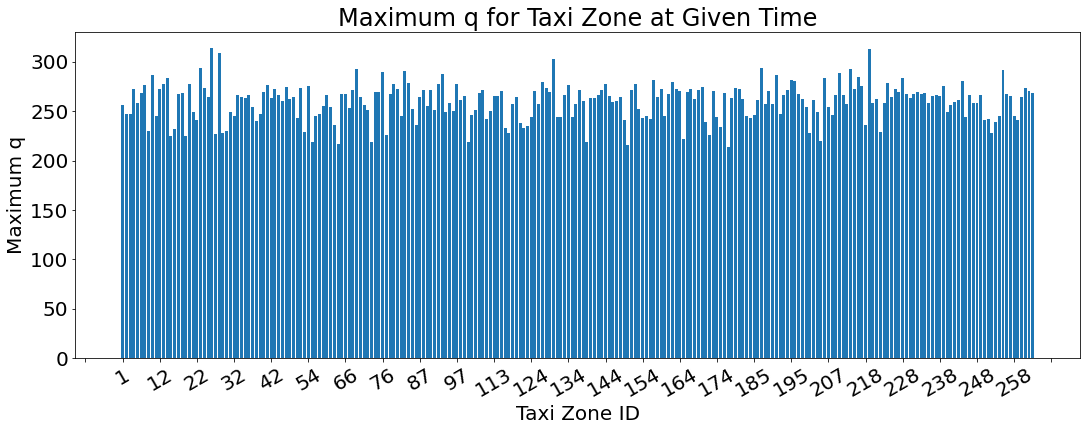

In [81]:
plot_v_s(v)

In [4]:
test2 = temp.loc[(temp['reward'] == 0) & (temp['action'] != temp['next_zone']) & (~temp['action_next'].isnull())]

In [6]:
temp

,episode,state,action,reward,state_next,action_next,cur_zone,next_zone,cur_time,next_time
0,2131,"(166, 36)",24,0.00,"(24, 36)",151.0,166,24.0,36,36.0
1,2131,"(24, 36)",151,0.00,"(151, 36)",238.0,24,151.0,36,36.0
2,2131,"(151, 36)",238,0.00,"(238, 37)",238.0,151,238.0,36,37.0
3,2131,"(238, 37)",238,17.65,"(186, 38)",186.0,238,186.0,37,38.0
4,2131,"(186, 38)",186,0.00,"(186, 39)",186.0,186,186.0,38,39.0
...,...,...,...,...,...,...,...,...,...,...
1865,9818,"(239, 58)",238,0.00,"(238, 58)",238.0,239,238.0,58,58.0
1866,9818,"(238, 58)",238,14.50,"(239, 59)",239.0,238,239.0,58,59.0
1867,9818,"(239, 59)",239,0.00,"(239, 60)",239.0,239,239.0,59,60.0
1868,9818,"(239, 60)",239,4.50,"(43, 60)",239.0,239,43.0,60,60.0


In [ ]:
with open('output/shA_1203_full/emp_history_v02_shA.pkl', 'rb') as handle:
    history_A = pickle.load(handle)

In [57]:
with open('output/shB_1202/emp_Q_v02_shB.pkl', 'rb') as handle:
    q_b = pickle.load(handle)

In [59]:
with open('output/shB_1202/emp_history_v02_shB.pkl', 'rb') as handle:
    his_b = pickle.load(handle)

In [60]:
his_b.keys()

dict_keys(['mean_max_q', 'mean_td_delta'])

In [ ]:
plt.plot(range(len(history['mean_max_q'])), history['mean_max_q'])
plt.title('Average Max Q over States')
plt.xlabel('Epsisode (in a hundred)')

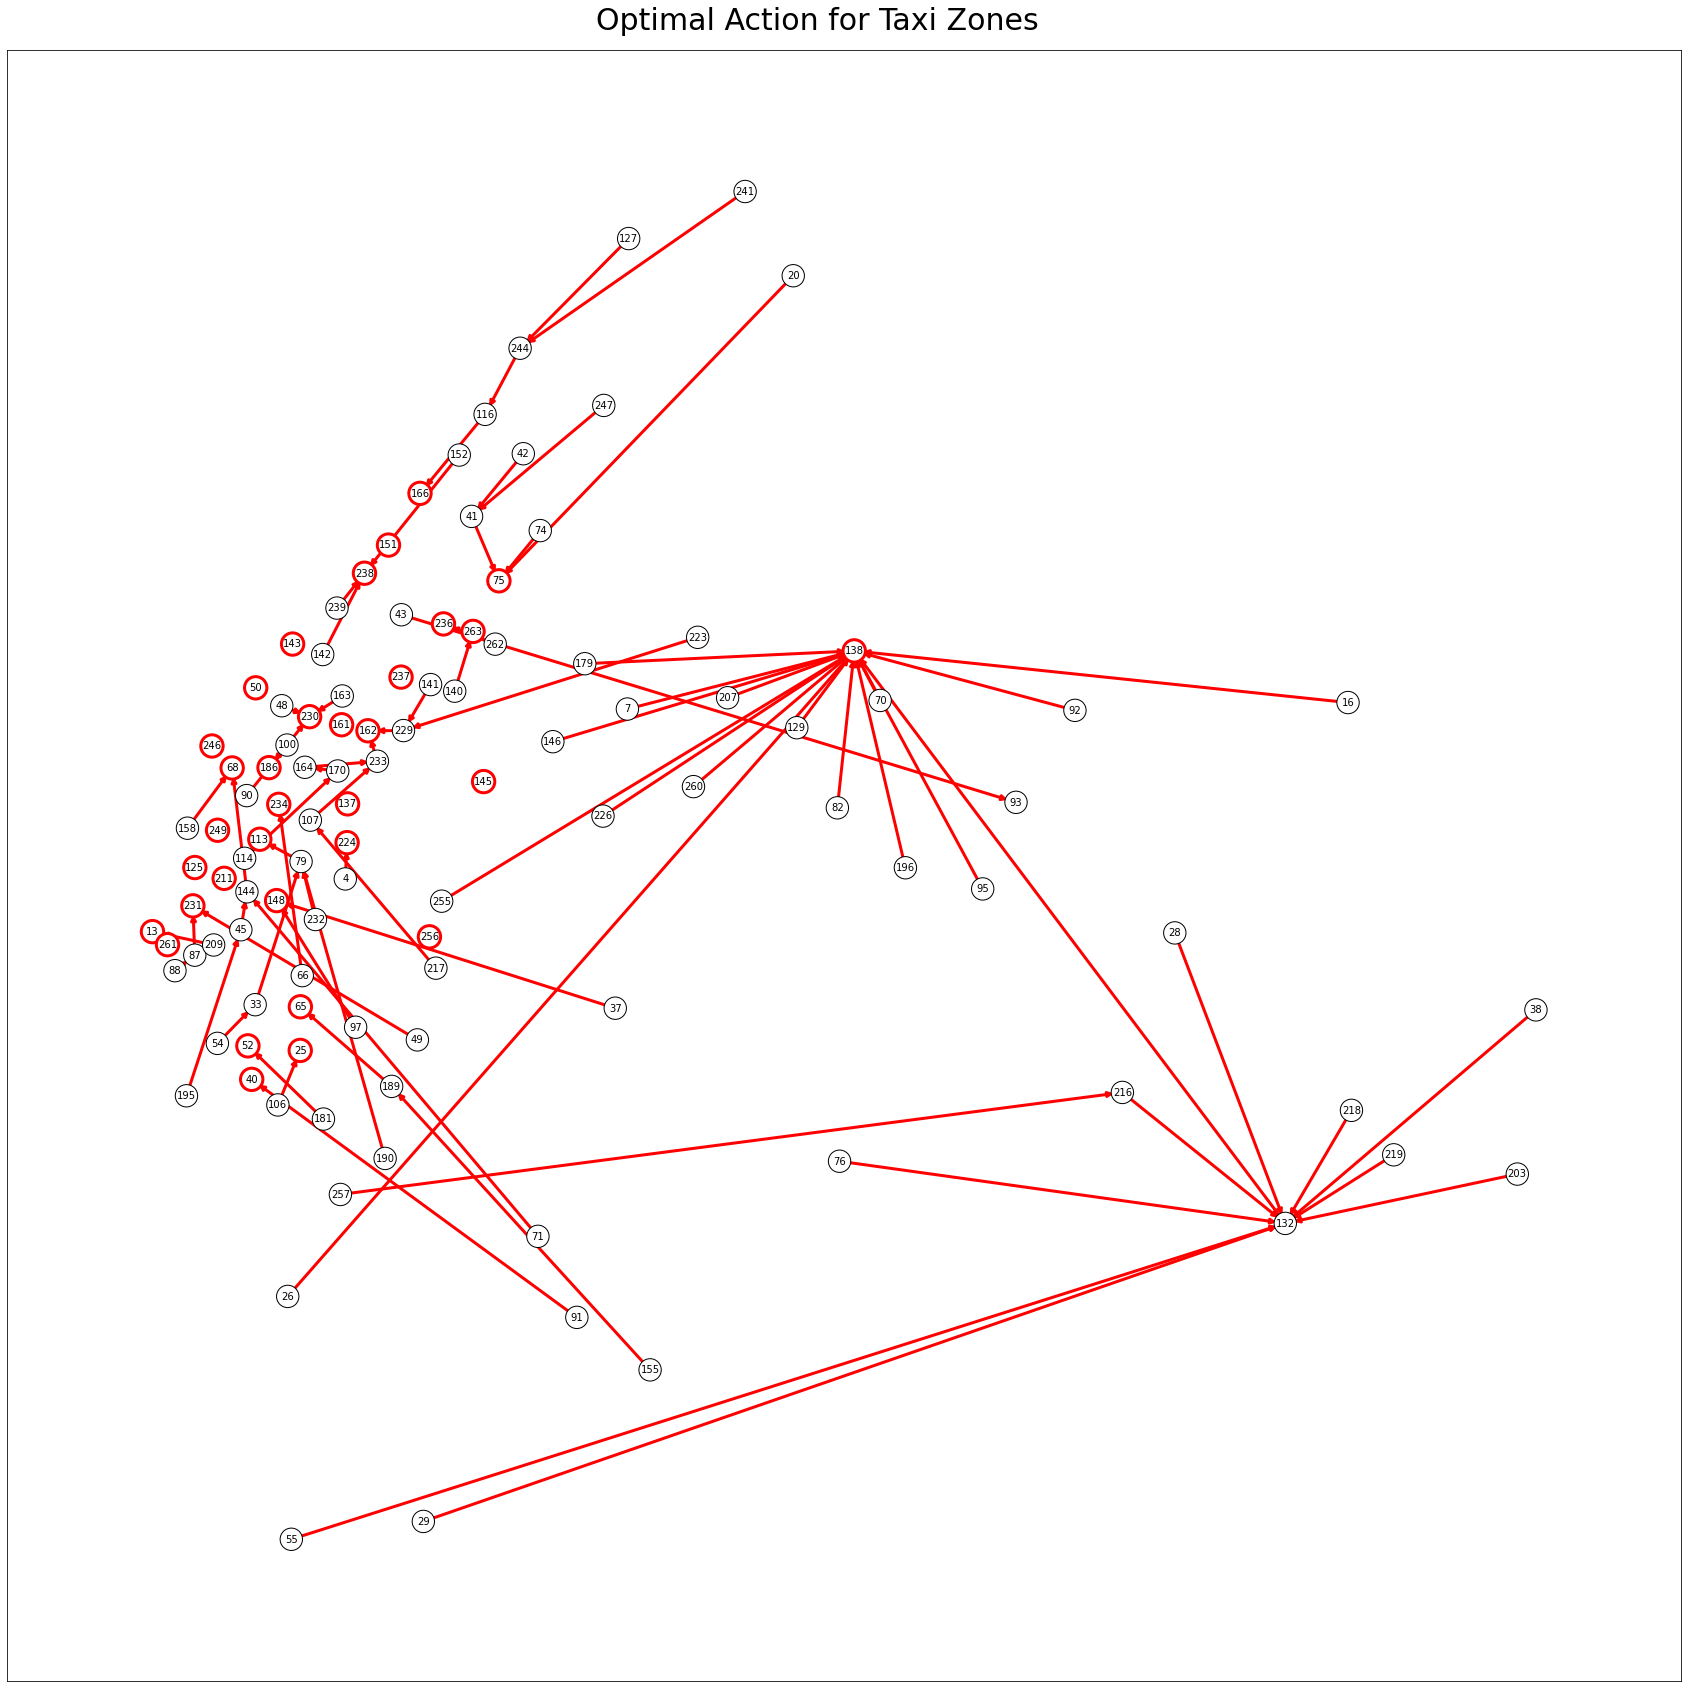

In [56]:
t = 12*4
v = plot_optimal_q(q_path='output/shB_1202/emp_Q_v02_shB.pkl', shp_file='data/taxi_zones/taxi_zones.shp', t=t) #plot_opt_Q_t{t}_v02_shB.png

In [ ]:
t = 16*4
v = plot_optimal_q(q_path='output/emp_Q_v02_shB.pkl', shp_file='data/taxi_zones/taxi_zones.shp',t=t)
#save_path=f'output/plot_opt_Q_t{t}_v02_shB.png'

In [ ]:
t = 20*4
v = plot_optimal_q(q_path='output/emp_Q_v02_shB.pkl', shp_file='data/taxi_zones/taxi_zones.shp', t=t)

In [ ]:
len(v[9])

In [ ]:
v[120]

In [ ]:
plot_v_s(v)

## Shift A

All outputs and plots in `output/shA_1203/`

In [ ]:
with open('output/shA_1203/emp_Q_v02_shA.pkl', 'rb') as handle:
    emp_Q_shA = pickle.load(handle)
with open('output/shA_1203/emp_history_v02_shA.pkl', 'rb') as handle:
    emp_history_shA = pickle.load(handle)

In [ ]:
v_dict = {}
for t in range(24*4):
    real_hour = t/4
    ## save every 3 hour
    if real_hour % 3 == 0:
        save_path = f'output/shA_1203/plot_opt_Q_t{t}_v02_shA.png'
    else:
        save_path = None
    v = plot_optimal_q(q_path='output/shA_1203/emp_Q_v02_shA.pkl', 
                       shp_file='data/taxi_zones/taxi_zones.shp', 
                       t=t, save_path = save_path)
    v_dict[t] = v

In [ ]:
plot_v_s(v_dict[0])

In [ ]:
with open('output/emp_Q_v02_partial.pkl', 'rb') as handle:
    emp_Q = pickle.load(handle)

In [ ]:
state_44 = [i for i in q1.keys() if i[0]==44]

In [ ]:
state_44

In [ ]:
emp_Q[(44, 72)].shape

In [ ]:
state_44 = [i for i in emp_Q.keys() if i[0]==44]
# for i in state_228
[max(emp_Q[i]) for i in state_44]

In [ ]:
state_t32 = [i for i in emp_Q.keys() if i[1]==33]
state_t32.sort()
[i for i in state_t32 if i[0]==39]

In [ ]:
np.where(emp_Q[(39, 33)]>0)

In [ ]:
with open('data/SARSA_eps_15m_v02.pickle', 'rb') as handle:
    emp_sarsa = pickle.load(handle)

In [ ]:
temp.iloc[173:176]

In [ ]:
# import numpy as np
temp = emp_sarsa#.loc[emp_sarsa['action'] == 182]
temp[temp['state'].str.contains('228')]

In [ ]:
emp_sarsa.loc[emp_sarsa['action'] == 184]